In [68]:
%matplotlib inline
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram

In [69]:
secret_number = "1000101"

In [70]:
backend = GenericBackendV2(num_qubits=len(secret_number)+1)
sampler = Sampler(mode=backend)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

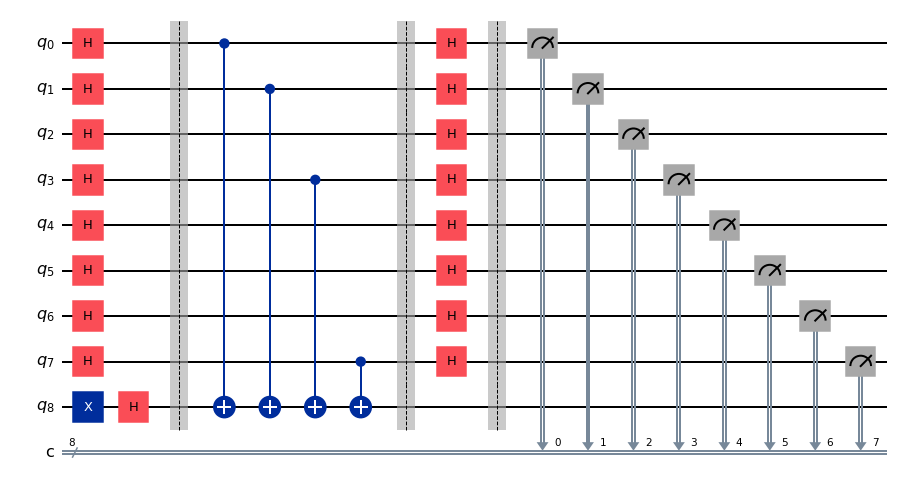

In [71]:
qc = QuantumCircuit(len(secret_number)+1, len(secret_number))

qc.h(range(len(secret_number)))
qc.x(len(secret_number))
qc.h(len(secret_number))

qc.barrier()

for index, one in enumerate(secret_number[::-1]):
    if one == "1":
        qc.cx(index, len(secret_number))

qc.barrier()

qc.h(range(len(secret_number)))

qc.barrier()

qc.measure(range(len(secret_number)), range(len(secret_number)))

qc.draw(output="mpl")

In [72]:
isa_circuit = pm.run(qc)
job = sampler.run([isa_circuit], shots=1)
result = job.result()
pub_result = result[0]

/home/henning/.local/lib/python3.10/site-packages/qiskit/providers/fake_provider/generic_backend_v2.py:975: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


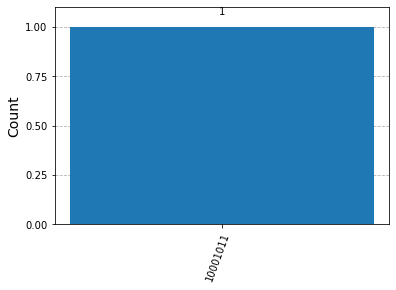

In [73]:
plot_histogram(pub_result.data.c.get_counts())